##### <div style="color:brown;background-color:lightblue;padding:3%;border-radius:150px 150px;font-size:2em;text-align:center">CAR PRICE PREDICTION</div>

## <a id="60" style="color:brown">Importing packages</a>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics  import f1_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
plt.style.use('fivethirtyeight')

## <a id="60" style="color:brown">Loading Dataset</a>

In [2]:
df=pd.read_csv("car data.csv")

In [3]:
df.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.642584,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


In [7]:
df.shape

(301, 9)

In [8]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [9]:
df.nunique()

Car_Name          98
Year              16
Selling_Price    156
Present_Price    148
Driven_kms       206
Fuel_Type          3
Selling_type       2
Transmission       2
Owner              3
dtype: int64

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [11]:
df.duplicated().sum()

2

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df['Car_age'] = 2023-df['Year']
df.drop('Year',axis=1,inplace=True)

## <a id="60" style="color:brown">Exploratory Data Analysis</a>
##### 1. Data Visualization:

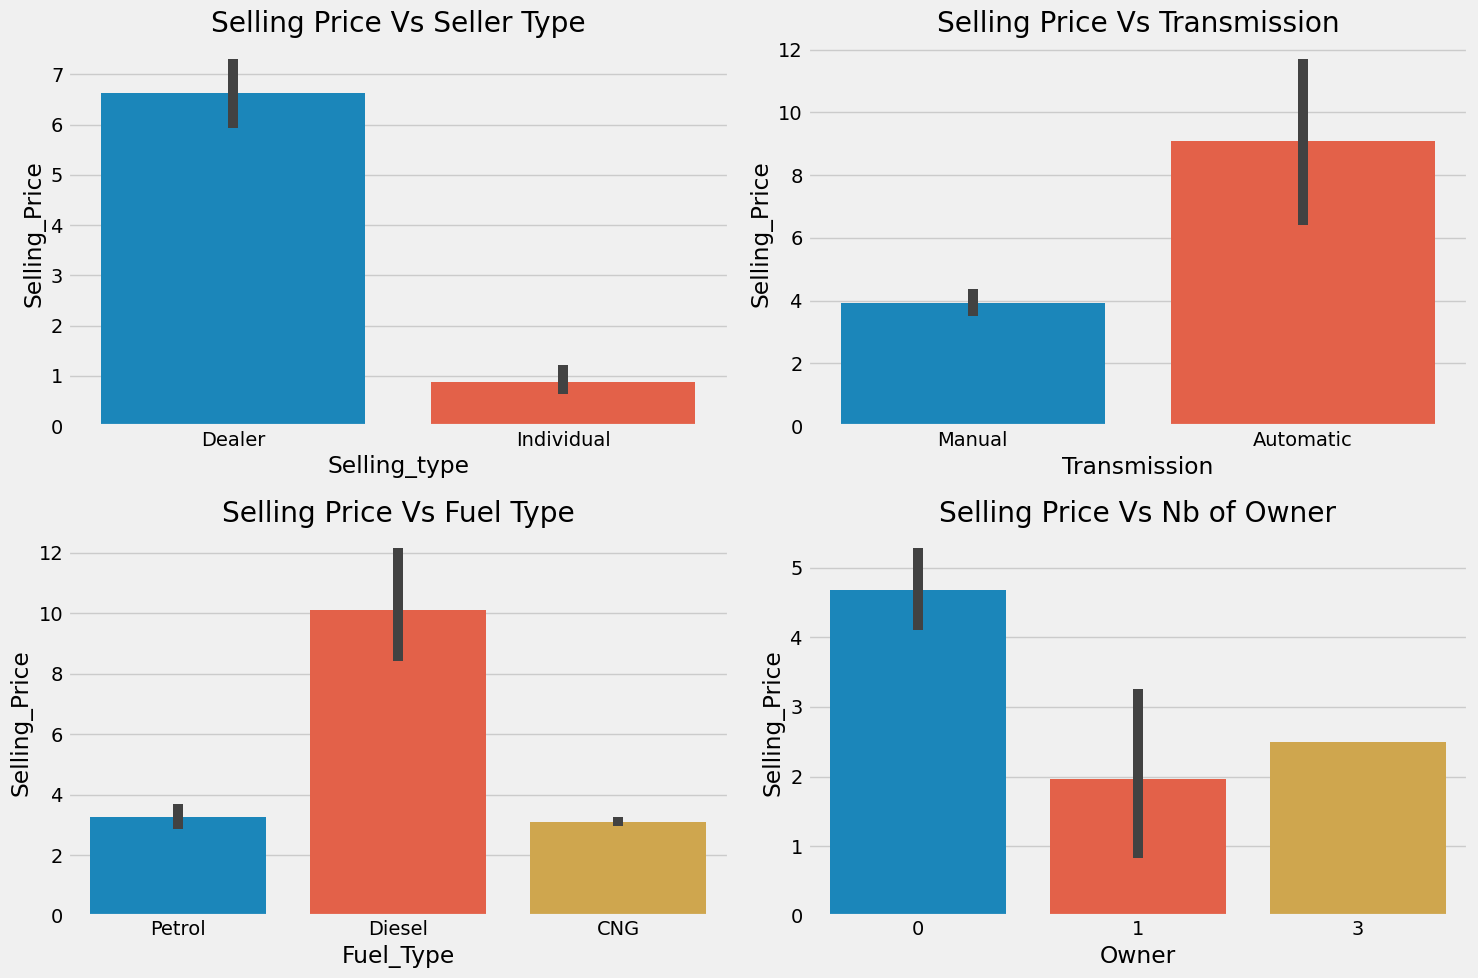

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.barplot(data=df,x='Selling_type',y='Selling_Price')
plt.title('Selling Price Vs Seller Type')

plt.subplot(2,2,2)
sns.barplot(data=df,x='Transmission',y='Selling_Price')
plt.title('Selling Price Vs Transmission')

plt.subplot(2,2,3)
sns.barplot(data=df,x='Fuel_Type',y='Selling_Price')
plt.title('Selling Price Vs Fuel Type')

plt.subplot(2,2,4)
sns.barplot(data=df,x='Owner',y='Selling_Price')
plt.title('Selling Price Vs Nb of Owner')
plt.tight_layout()
plt.show()

###### Observations:
We have higher Selling Price when sold by Dealers compared to Individuals.

Selling Price would be higher for cars that are Automatic.

Selling Price of cars with Fuel Type of Diesel is higher than Petrol and CNG

Selling Price is high with less Owners used Cars

Text(0.5, 1.0, 'Selling Price Vs Car Age')

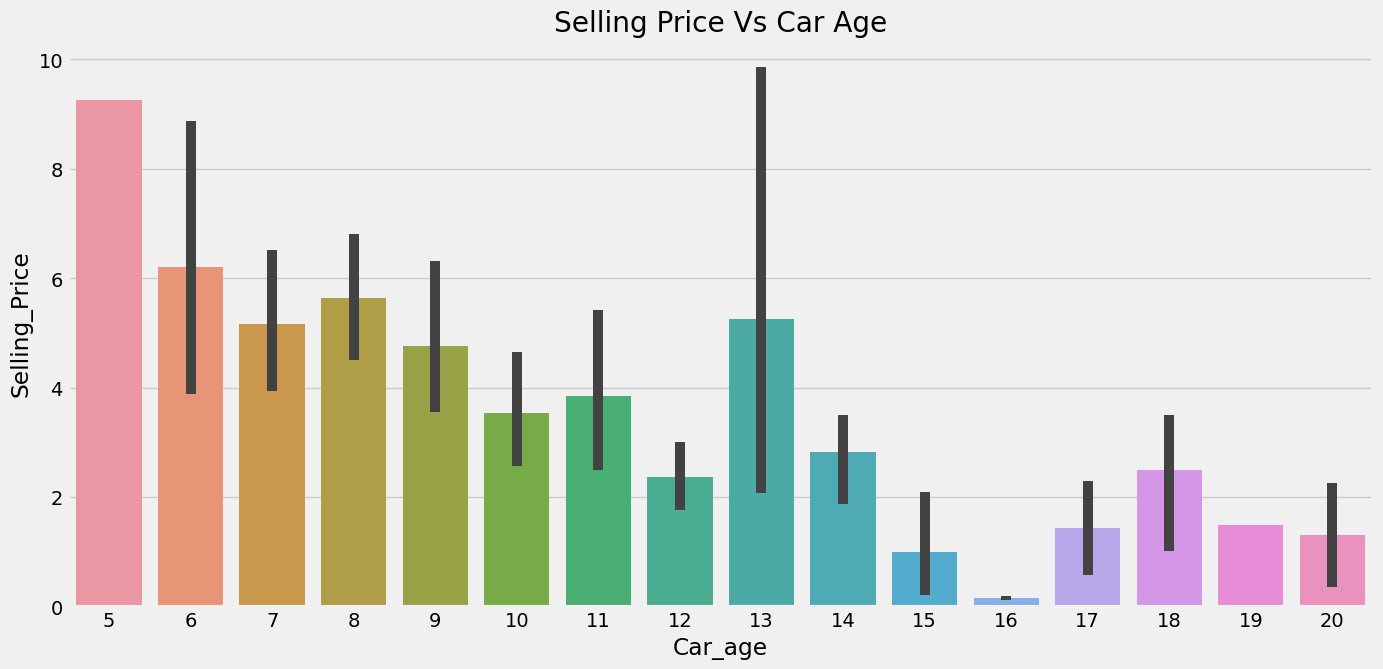

In [15]:
plt.figure(figsize=(15,7))
sns.barplot(data=df,x='Car_age',y='Selling_Price')
plt.title('Selling Price Vs Car Age')

#### Observations:

Selling Price of cars 5 years old would be high and gradually decreases with car of 20 years old

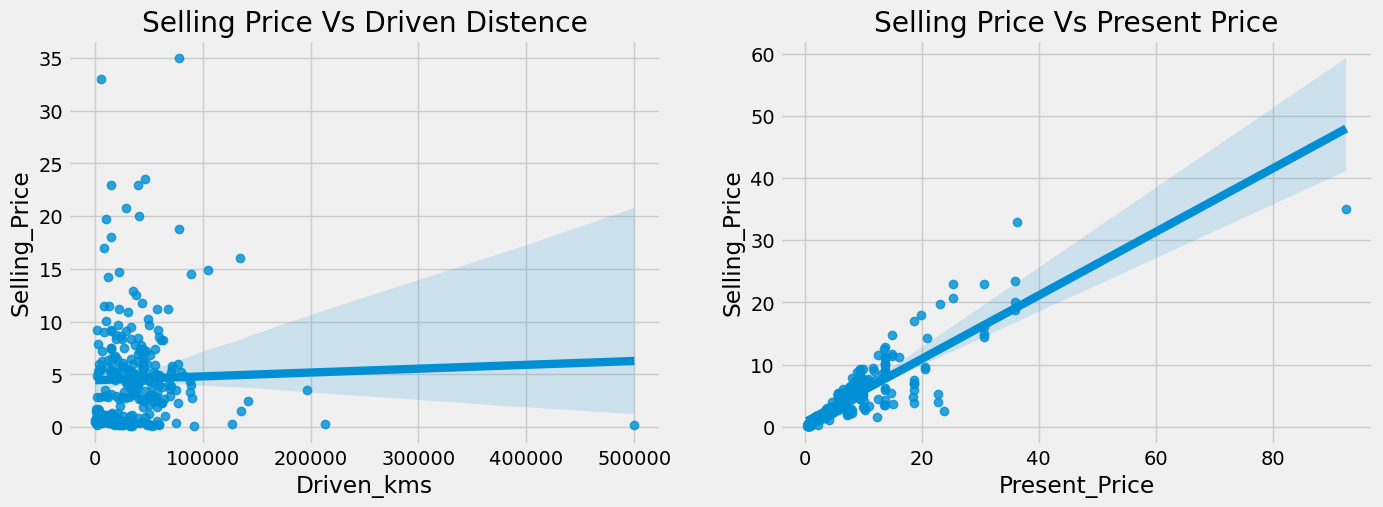

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.regplot(data=df,x='Driven_kms',y='Selling_Price')
plt.title('Selling Price Vs Driven Distence')
plt.subplot(1,2,2)
sns.regplot(data=df,x='Present_Price',y='Selling_Price')
plt.title('Selling Price Vs Present Price')
plt.show()

##### Observations:

Lesser the driven distance, higher the Selling Price.

Selling Price tends to increase with increase in the Present Price of cars.

#### 2. Dealing with Categorical Variables:

In [17]:
cat_col = ['Fuel_Type','Selling_type','Transmission','Car_Name']
for i in cat_col:
    print(df[i].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
['ritz' 'sx4' 'ciaz' 'wagon r' 'swift' 'vitara brezza' 's cross'
 'alto 800' 'ertiga' 'dzire' 'alto k10' 'ignis' '800' 'baleno' 'omni'
 'fortuner' 'innova' 'corolla altis' 'etios cross' 'etios g' 'etios liva'
 'corolla' 'etios gd' 'camry' 'land cruiser' 'Royal Enfield Thunder 500'
 'UM Renegade Mojave' 'KTM RC200' 'Bajaj Dominar 400'
 'Royal Enfield Classic 350' 'KTM RC390' 'Hyosung GT250R'
 'Royal Enfield Thunder 350' 'KTM 390 Duke ' 'Mahindra Mojo XT300'
 'Bajaj Pulsar RS200' 'Royal Enfield Bullet 350'
 'Royal Enfield Classic 500' 'Bajaj Avenger 220' 'Bajaj Avenger 150'
 'Honda CB Hornet 160R' 'Yamaha FZ S V 2.0' 'Yamaha FZ 16'
 'TVS Apache RTR 160' 'Bajaj Pulsar 150' 'Honda CBR 150' 'Hero Extreme'
 'Bajaj Avenger 220 dtsi' 'Bajaj Avenger 150 street' 'Yamaha FZ  v 2.0'
 'Bajaj Pulsar  NS 200' 'Bajaj Pulsar 220 F' 'TVS Apache RTR 180'
 'Hero Passion X pro' 'Bajaj Pulsar NS 200' 'Yamaha Fazer '
 'Honda Activa 4G' 

In [18]:
df = df.drop(labels='Car_Name', axis=1)

In [19]:
col = ['Fuel_Type','Selling_type','Transmission']
df_new = pd.concat([df]+[pd.get_dummies(df[i],drop_first=True,prefix=i+'_') for i in col],axis=1)
df_new.drop(['Fuel_Type','Selling_type','Transmission'],axis=1,inplace=True)
df_new.head()

,Selling_Price,Present_Price,Driven_kms,Owner,Car_age,Fuel_Type__Diesel,Fuel_Type__Petrol,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,27000,0,9,False,True,False,True
1,4.75,9.54,43000,0,10,True,False,False,True
2,7.25,9.85,6900,0,6,False,True,False,True
3,2.85,4.15,5200,0,12,False,True,False,True
4,4.60,6.87,42450,0,9,True,False,False,True


In [20]:
df_no_multicolinearity = df_new.drop(['Driven_kms','Fuel_Type__Petrol'],axis=1)

#### Feature Selection
Feature selection simplified models, improves speed and prevent a series of unwanted issues arising from having many features

<Axes: >

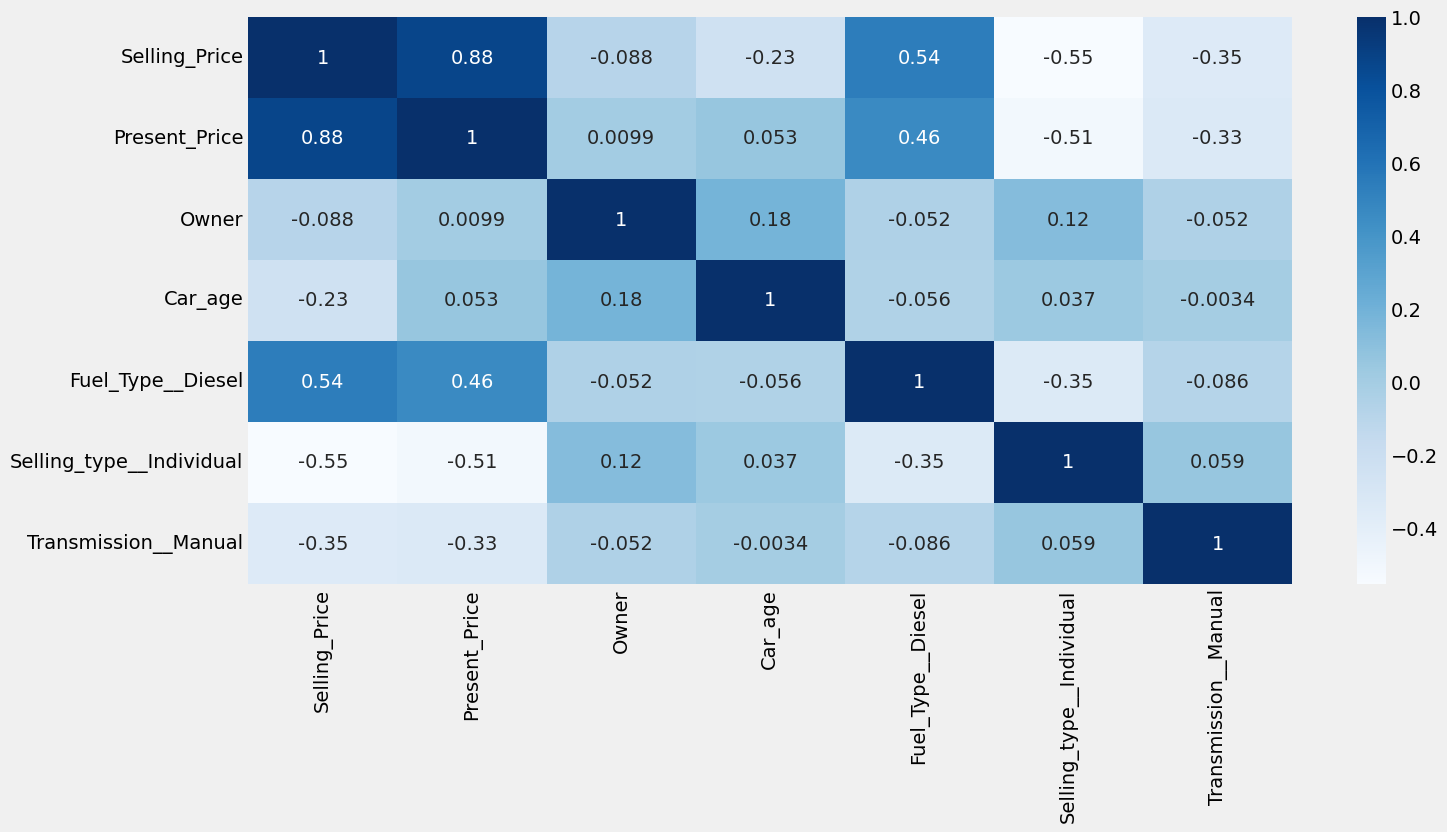

In [21]:
plt.figure(figsize=[15,7])
sns.heatmap(df_no_multicolinearity.corr(), annot=True,cmap='Blues')

#### Feature Importance:

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards our Target variable.

In [22]:
X = df_no_multicolinearity.drop('Selling_Price',axis=1)
y = df_no_multicolinearity['Selling_Price']

In [23]:
from sklearn.ensemble import ExtraTreesRegressor
etree = ExtraTreesRegressor()
etree.fit(X,y)

ExtraTreesRegressor()

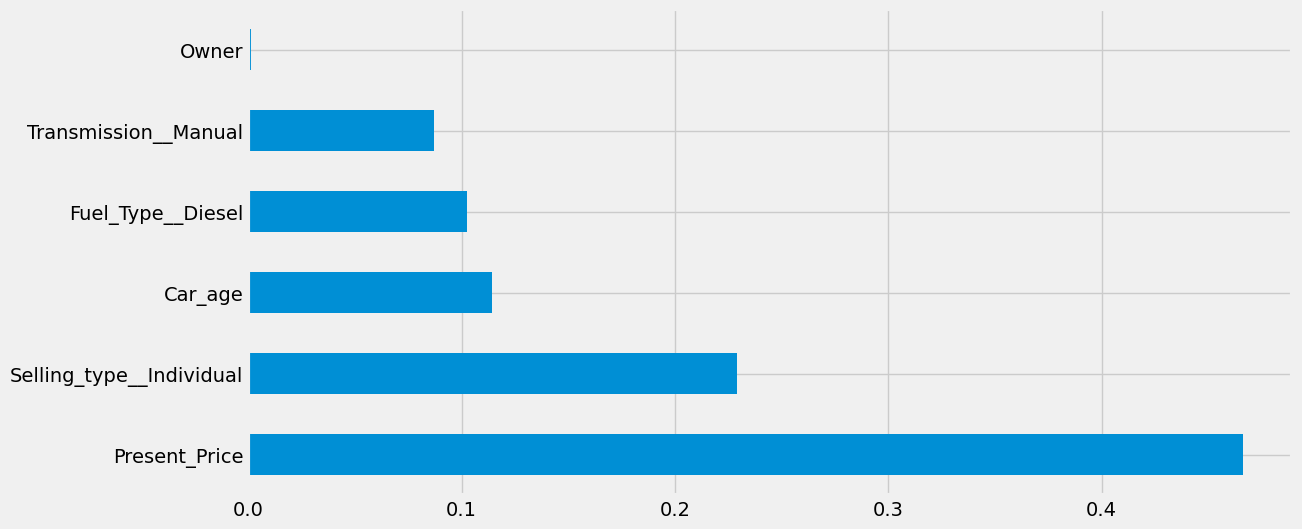

In [24]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(etree.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [25]:
print(feat_importances.sort_values(ascending=False))

Present_Price               0.465992
Selling_type__Individual    0.229014
Car_age                     0.114301
Fuel_Type__Diesel           0.102422
Transmission__Manual        0.087172
Owner                       0.001099
dtype: float64


In [26]:
final_df = df_no_multicolinearity[['Selling_Price', 'Present_Price','Car_age','Fuel_Type__Diesel','Selling_type__Individual','Transmission__Manual']]
final_df.head()

,Selling_Price,Present_Price,Car_age,Fuel_Type__Diesel,Selling_type__Individual,Transmission__Manual
0,3.35,5.59,9,False,False,True
1,4.75,9.54,10,True,False,True
2,7.25,9.85,6,False,False,True
3,2.85,4.15,12,False,False,True
4,4.60,6.87,9,True,False,True


## <a id="60" style="color:brown">Model Development:</a>

In [27]:
X = df[['Present_Price', 'Driven_kms']]
y = df['Selling_Price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=224)

In [29]:
rd = RandomForestRegressor()
rd.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
print("Accuracy(Logistic Regression): ",rd.score(X_test,y_test)*100)

Accuracy(Logistic Regression):  88.71462780440966


In [31]:
svc = DecisionTreeRegressor()
svc.fit(X_train, y_train)

DecisionTreeRegressor()

In [32]:
print("Accuracy(Logistic Regression): ",svc.score(X_test,y_test)*100)

Accuracy(Logistic Regression):  90.16815913912141


In [33]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=224)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"r^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

r^2 score: 0.7780916390255854
MSE: 6.690101619040791
MAE: 1.5740216924076664
MAPE: 0.9288533638782759


In [34]:
df.sort_values(by=['Selling_Price'], ascending=False).head(10)

,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,Car_age
86,35.00,92.60,78000,Diesel,Dealer,Manual,0,13
64,33.00,36.23,6000,Diesel,Dealer,Automatic,0,6
63,23.50,35.96,47000,Diesel,Dealer,Automatic,0,8
82,23.00,25.39,15000,Diesel,Dealer,Automatic,0,6
51,23.00,30.61,40000,Diesel,Dealer,Automatic,0,8
96,20.75,25.39,29000,Diesel,Dealer,Automatic,0,7
59,19.99,35.96,41000,Diesel,Dealer,Automatic,0,9
66,19.75,23.15,11000,Petrol,Dealer,Automatic,0,6
62,18.75,35.96,78000,Diesel,Dealer,Automatic,0,9
52,18.00,19.77,15000,Diesel,Dealer,Automatic,0,6


In [35]:
df = df[df['Selling_Price'] < 30.0]

In [36]:
X = df[['Present_Price', 'Driven_kms']]
y = df['Selling_Price']
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=224)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"r^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

r^2 score: 0.7653737820820989
MSE: 4.382247941383994
MAE: 1.304941154224964
MAPE: 0.6137741376783556


In [37]:
from sklearn.linear_model import Ridge

In [38]:
X = df[['Present_Price', 'Driven_kms']]
y = df['Selling_Price']
ridge = Ridge(alpha=0.01)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=224)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f"r^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MAPE: {mean_absolute_percentage_error(y_test, y_pred)}")

r^2 score: 0.7653739853296557
MSE: 4.382244145213235
MAE: 1.304941545555061
MAPE: 0.6137749660829274


In [39]:
X = df[['Selling_Price', 'Present_Price', 'Driven_kms']]
y = df['Selling_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=224)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
lr = LogisticRegression(random_state=224)
lr.fit(X_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
y_pred = lr.predict(X_test_scaled)
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

Accuracy score: 0.9666666666666667
